<a href="https://colab.research.google.com/github/lyanasky/Cyclistic-Bikeshare/blob/main/cyclistic_bikeshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships.

* Customers who purchase single-ride or full-day passes are referred toas casual riders.
* Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a solid opportunity to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the team needs to
* Better understand how annual members and casual riders differ,
* Why casual riders would buy a membership, and
* How digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.


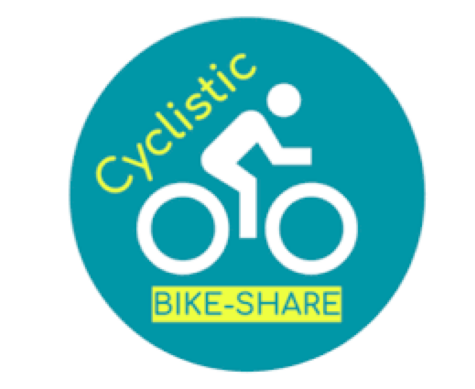

In [27]:


Cyclistic_Bike_share_png = '/content/drive/MyDrive/Cyclistic Bike-share.png'
Cyclistic_Bike_share_png_image = Image.open(Cyclistic_Bike_share_png)

# Display the image using matplotlib
plt.imshow(Cyclistic_Bike_share_png_image)
plt.axis('off')
plt.show()

#Stakeholders
* Primary: Director of Marketing, Marketing analytic team
* Secondary: Cyclistic Executive team

#Statement of Business Task


This project conducts a comprehensive analysis of the usage patterns and behaviors of annual members and casual riders within the Cyclistic bike-sharing program. The primary objective is to identify key distinctions in how these two user segments engage with the service. By understanding the differences, the goal is to inform the development of targeted marketing strategies aimed at converting casual riders into annual members. The underlying motivation is the financial insight provided by the finance team, highlighting the increased profitability associated with annual memberships compared to casual rides. Ultimately, my analysis aims to provide actionable insights that can be leveraged to enhance Cyclistic's marketing approach and drive the conversion of casual riders into more profitable annual members.

#Set up environment


Note: We shall call the python library The python is a collection of packages in python with a common design philosophy for data manipulation, exploration, and visualization.



The 'Cyclistic' historical trip data is downloaded from link.
"https://divvy-tripdata.s3.amazonaws.com/index.html"

Cyclistic is a fictional company, and it leverages on data provided by Motivate International Inc. under this license for this case study. https://divvybikes.com/data-license-agreement

#Excel
The data is stored in xslx in Excel folders. I downloaded the data unzipped the file and opened it with Excel. I changed the naming convention to the appropriate naming type. The file was stored in .xls and I created a subfolder and changed it to .csv.

 # Create Colums
 To create columns for analysis in future, I opened  the excel workbook created a new colunm called save it to the appropriate subfolder.
I Opened my excel workbook and created a column called “ride_length.” Calculate the length of each ride by subtracting the
column “started_at” from the column “ended_at” (for example, =D2-C2) and format as HH:MM:SS using Format > Cells >

Next Created a column called “day_of_week,” and calculate the day of the week that each ride started using the “WEEKDAY”
command (for example, =WEEKDAY(C2,1)) in each file. Format as General or as a number with no decimals, noting that 1 =
Sunday and 7 = Saturday.




#Import Liberaris

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime as dt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import PercentFormatter
from PIL import Image
from IPython.display import display


#Load Data
Let's start by loading the 3 files of the cyclistic historical data, representing the first quater of the year.

In [3]:
bike_share1 = pd.read_excel('/content/drive/MyDrive/data_1.xlsx')
bike_share2 = pd.read_excel('/content/drive/MyDrive/data_2.xlsx')
bike_share3 = pd.read_excel('/content/drive/MyDrive/data_3.xlsx')

In [ ]:
#Dropped unwanted columnes
# Inspect the first three rows in the  dataframe.
bike_share1 = pd.read_excel('/content/drive/MyDrive/data_1.xlsx')
bike_share1.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)
bike_share1.head(n = 3)

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,day_of_week,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,00:26:49,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,1,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,00:08:09,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,6,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,00:14:23,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,4,member


In [ ]:
#Dropped unwanted columnes
# Inspect the first three rows in the  dataframe.
bike_share2 = pd.read_excel('/content/drive/MyDrive/data_2.xlsx')
bike_share2.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)
bike_share2.head(n = 3)

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,day_of_week,member_casual
0,02668AD35674B983,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,00:12:57,Franklin St & Jackson Blvd,36,Wabash Ave & Grand Ave,199.0,4,member
1,7A50CCAF1EDDB28F,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,00:18:29,Clark St & Wrightwood Ave,340,Clark St & Leland Ave,326.0,2,casual
2,2FFCDFDB91FE9A52,docked_bike,2020-05-02 14:11:03,2020-05-02 15:48:21,01:37:18,Kedzie Ave & Milwaukee Ave,260,Kedzie Ave & Milwaukee Ave,260.0,7,casual


In [ ]:
#Dropped unwanted columnes
# Inspect the first three rows in the  dataframe.
bike_share3 = pd.read_excel('/content/drive/MyDrive/data_3.xlsx')
bike_share3.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)
bike_share3.head(n = 3)

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,day_of_week,member_casual
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,00:12:07,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163.0,7,casual
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,00:05:48,Federal St & Polk St,41,Daley Center Plaza,81.0,6,member
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,00:08:33,Daley Center Plaza,81,State St & Harrison St,5.0,3,member


# Inspect Datatypes

In [ ]:
bike_share1 = pd.read_excel('/content/drive/MyDrive/data_1.xlsx')
for column in bike_share1.columns:
    print(column, bike_share1[column].dtypes)
    print("done")


In [ ]:
bike_share2 = pd.read_excel('/content/drive/MyDrive/data_2.xlsx')
for column in bike_share1.columns:
    print(column, bike_share1[column].dtypes)
    print("done")

In [ ]:
bike_share3 = pd.read_excel('/content/drive/MyDrive/data_3.xlsx')
for column in bike_share1.columns:
    print(column, bike_share1[column].dtypes)
    print("done")


ride_id object
done
rideable_type object
done
started_at datetime64[ns]
done
ended_at datetime64[ns]
done
ride_length object
done
start_station_name object
done
start_station_id int64
done
end_station_name object
done
end_station_id float64
done
start_lat float64
done
start_lng float64
done
end_lat float64
done
end_lng float64
done
day_of_week int64
done
member_casual object
done


#Merge three dataframes into one.

In [5]:
 #Join all dataframes into one dataframe
merged_df = pd.merge(bike_share1, bike_share2, how='left')
final_df = pd.merge(merged_df, bike_share3, how='left')
final_df = final_df.reset_index(drop=True)
final_df.index = final_df.index + 1
final_df.head(n= 3)

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,day_of_week,member_casual
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,00:26:49,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,1,member
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,00:08:09,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,6,member
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,00:14:23,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,4,member


In [ ]:
# Get dataframe total row counts for each of the 13 different dataframes
total_rows = final_df.shape[0]
print("Total number of rows:", total_rows)



Total number of rows: 343005


# Cleaning and Data Transformatio

In [6]:
#Make a copy of the dataframe
cyclistic_df = final_df.copy()



In [ ]:
# Check for nulls through entire dataframe
cyclistic_df.isnull().sum()

ride_id                 0
rideable_type           0
started_at              0
ended_at                0
ride_length             0
start_station_name      0
start_station_id        0
end_station_name      468
end_station_id        468
start_lat               0
start_lng               0
end_lat               468
end_lng               468
day_of_week             0
member_casual           0
dtype: int64

The first seven rows have no null values but other rows contain null values in their thousands.

# Replace all null values with N/A

In [ ]:
cyclistic_df = cyclistic_df.fillna("n/a")


In [ ]:
# Check number of unique values in entire dataframe
cyclistic_df.nunique()

ride_id               84776
rideable_type             1
started_at            81200
ended_at              81029
ride_length            6752
start_station_name      602
start_station_id        602
end_station_name        601
end_station_id          601
start_lat               515
start_lng               481
end_lat                 515
end_lng                 486
day_of_week               7
member_casual             2
dtype: int64

In [ ]:
# Find duplicate rows in entire dataframe
dup_rows = cyclistic_df[cyclistic_df.duplicated(keep='last')]

In [ ]:
# Count duplicate rows found
print("Duplicate rows found:", len(dup_rows.index))

Duplicate rows found: 0


No duplicate found

In [ ]:
# Convert dtype of rideable_type
cyclistic_df['rideable_type'] = cyclistic_df['rideable_type'].astype('category')
cyclistic_df['rideable_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84776 entries, 1 to 84776
Series name: rideable_type
Non-Null Count  Dtype   
--------------  -----   
84776 non-null  category
dtypes: category(1)
memory usage: 83.0 KB


In [ ]:
# Check data type of 'started_at' column
cyclistic_df['started_at'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84776 entries, 1 to 84776
Series name: started_at
Non-Null Count  Dtype         
--------------  -----         
84776 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 662.4 KB


In [ ]:
#Convert Data Type
cyclistic_df['started_at'] = cyclistic_df['started_at'].astype(str)

In [ ]:
# Split column into 2 separate columns
cyclistic_df[['start_date', 'start_time']] = cyclistic_df.started_at.str.split(" ", expand = True)
cyclistic_df.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,day_of_week,member_casual,start_date,start_time
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,00:26:49,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,1,member,2020-04-26,17:45:14
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,00:08:09,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,6,member,2020-04-17,17:08:54
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,00:14:23,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.623,4,member,2020-04-01,17:54:13
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,00:12:12,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,3,member,2020-04-07,12:50:19
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,00:52:55,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,7,casual,2020-04-18,10:22:59


In [ ]:
# Check string lengths
start_time_len = cyclistic_df['start_time'].str.len().unique()
start_time_len

array([8])

In [ ]:
cyclistic_df['start_date'].head()

1    2020-04-26
2    2020-04-17
3    2020-04-01
4    2020-04-07
5    2020-04-18
Name: start_date, dtype: object

In [ ]:
# Check string lengths
start_date_len = cyclistic_df['start_date'].str.len().unique()
start_date_len

array([10])

In [ ]:
# Find rows in start_date column that don't start with '2020'
cyclistic_df[~cyclistic_df['start_date'].str.startswith(('2020'))]

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,day_of_week,member_casual,start_date,start_time


In [ ]:
cyclistic_df['started_at'].dtype

dtype('O')

In [ ]:
#Convert to datetimelink
cyclistic_df['started_at'] = pd.to_datetime(cyclistic_df['started_at'])


In [ ]:
cyclistic_df['day_of_week'] = cyclistic_df['started_at'].dt.day_name()

In [ ]:
# Extract ride start hour of day column
cyclistic_df['hour_of_day'] = cyclistic_df['started_at'].dt.strftime("%I %p")

In [ ]:
# Extract ride start month column
cyclistic_df['month'] = cyclistic_df['started_at'].dt.strftime("%B")

In [ ]:
cyclistic_df.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,day_of_week,member_casual,start_date,start_time,hour_of_day,month
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,00:26:49,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,Sunday,member,2020-04-26,17:45:14,05 PM,April
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,00:08:09,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,Friday,member,2020-04-17,17:08:54,05 PM,April
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,00:14:23,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.623,Wednesday,member,2020-04-01,17:54:13,05 PM,April
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,00:12:12,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,Tuesday,member,2020-04-07,12:50:19,12 PM,April
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,00:52:55,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,Saturday,casual,2020-04-18,10:22:59,10 AM,April


In [ ]:
cyclistic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 1 to 84776
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             84776 non-null  object        
 1   rideable_type       84776 non-null  category      
 2   started_at          84776 non-null  datetime64[ns]
 3   ended_at            84776 non-null  datetime64[ns]
 4   ride_length         84776 non-null  object        
 5   start_station_name  84776 non-null  object        
 6   start_station_id    84776 non-null  int64         
 7   end_station_name    84776 non-null  object        
 8   end_station_id      84776 non-null  object        
 9   start_lat           84776 non-null  float64       
 10  start_lng           84776 non-null  float64       
 11  end_lat             84776 non-null  object        
 12  end_lng             84776 non-null  object        
 13  day_of_week         84776 non-null  object    

In [ ]:
# Check data type of 'started_at' column
cyclistic_df['ended_at'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84776 entries, 1 to 84776
Series name: ended_at
Non-Null Count  Dtype         
--------------  -----         
84776 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 662.4 KB


In [ ]:
# Convert to datetime dtype
cyclistic_df['ended_at'] = pd.to_datetime(cyclistic_df['ended_at'])

In [ ]:
cyclistic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 1 to 84776
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             84776 non-null  object        
 1   rideable_type       84776 non-null  category      
 2   started_at          84776 non-null  datetime64[ns]
 3   ended_at            84776 non-null  datetime64[ns]
 4   ride_length         84776 non-null  object        
 5   start_station_name  84776 non-null  object        
 6   start_station_id    84776 non-null  int64         
 7   end_station_name    84776 non-null  object        
 8   end_station_id      84776 non-null  object        
 9   start_lat           84776 non-null  float64       
 10  start_lng           84776 non-null  float64       
 11  end_lat             84776 non-null  object        
 12  end_lng             84776 non-null  object        
 13  day_of_week         84776 non-null  object    

In [ ]:
cyclistic_df.head()

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,day_of_week,member_casual,start_date,start_time,hour_of_day,month
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,00:26:49,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,Sunday,member,2020-04-26,17:45:14,05 PM,April
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,00:08:09,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,Friday,member,2020-04-17,17:08:54,05 PM,April
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,00:14:23,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.623,Wednesday,member,2020-04-01,17:54:13,05 PM,April
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,00:12:12,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,Tuesday,member,2020-04-07,12:50:19,12 PM,April
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,00:52:55,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,Saturday,casual,2020-04-18,10:22:59,10 AM,April


ended_at column has been successfully parsed to datetime dtype.

In [ ]:
# Create string column to count character length
cyclistic_df['start_lat_str'] = cyclistic_df['start_lat'].astype(str)

In [ ]:
# Check string lengths
start_lat_len = cyclistic_df['start_lat_str'].str.len().unique()
start_lat_len

array([7, 6, 5])

In [ ]:
# Create string column to count character length
cyclistic_df['start_lng_str'] = cyclistic_df['start_lng'].astype(str)

In [ ]:
# Check string lengths
start_lng_len = cyclistic_df['start_lng_str'].str.len().unique()
start_lng_len

array([7, 8, 6])

In [ ]:
# Create string column to count character length
cyclistic_df['end_lat_str'] = cyclistic_df['end_lat'].astype(str)

In [ ]:
# Check string lengths
end_lat_len = cyclistic_df['end_lat_str'].str.len().unique()
end_lat_len

array([7, 6, 5, 3])

In [ ]:
# Create string column to count character length
cyclistic_df['end_lng_str'] = cyclistic_df['end_lng'].astype(str)

In [ ]:
# Check string lengths
end_lng_len = cyclistic_df['end_lng_str'].str.len().unique()
end_lng_len

array([8, 7, 6, 3])

In [ ]:
# Convert dtype of member_casual
cyclistic_df['member_casual'] = cyclistic_df['member_casual'].astype('category')
cyclistic_df['member_casual'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84776 entries, 1 to 84776
Series name: member_casual
Non-Null Count  Dtype   
--------------  -----   
84776 non-null  category
dtypes: category(1)
memory usage: 83.0 KB


#Analysis Of Variables

In [ ]:
# Get subset
df_bstat = cyclistic_df['member_casual']

In [ ]:
# Describe data
df_bstat.describe().to_frame()

,member_casual
count,84776
unique,2
top,member
freq,61148


In [ ]:
# Get counts
df_bstat.value_counts().to_frame()

,count
member_casual,
member,61148
casual,23628


In [ ]:
# plt.style.available

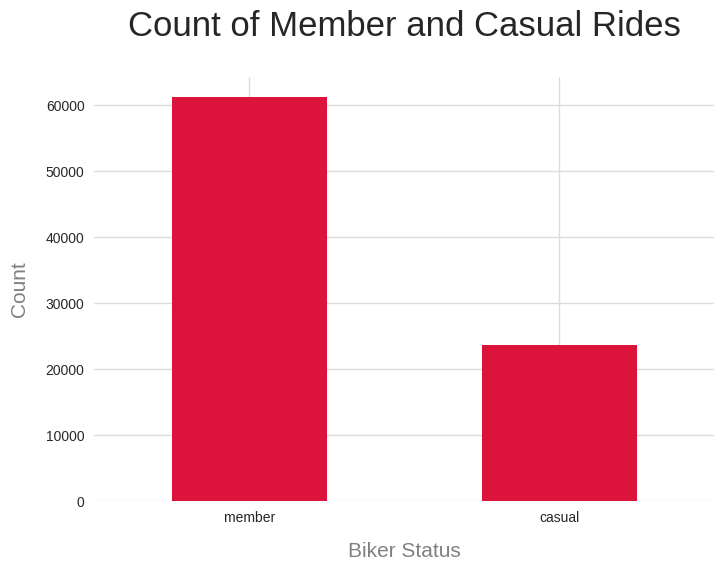

In [ ]:
# Visualize counts
# Plot style
#plt.tight_layout()
plt.style.use(
    'default'),
plt.style.use(
    'seaborn-v0_8')
mpl.rcParams.update(
    {"axes.grid" : True,
     "grid.color": "gainsboro"}
)
plt.rcParams[
    'axes.facecolor'] = 'w'

# Plot
df_bstat.value_counts().plot(
    kind='bar', color='#DC143C')
# Ax and text
plt.xticks(
    rotation=0
)
plt.ylabel("Count",
    labelpad = 12,
    fontsize=15,
    color= 'grey')
plt.xlabel(
    "Biker Status",
    labelpad = 12,
    fontsize=15,
    color= 'grey')
plt.title(
    "Count of Member and Casual Rides",
    fontsize=25,
    pad=30)
# Show plot
plt.show()

In the frequency bar plot above we can see member counts breaking above the 3.5 million line while casual user counts sit just below 2.5 million rides. Annual Members account for the majority of the bike rides in the dataset. This shows us that Annual Members potentially ride bikes more often than non-members, who are also known as, casual riders.

In [ ]:
# Get proportions object
df_bstat_prop = df_bstat.value_counts(normalize = True)
df_bstat_prop.to_frame()

,proportion
member_casual,
member,0.721289
casual,0.278711


There's an approximate 60/40 ratio split between member and non-member rides, Cyclistic's historical bike share program data. 3,659,726 annual membership rides represent 60% of the whole, while 2,421,915 casual bike rides constitute the other 40% of the 6,081,641 ride count total.

#Visualize

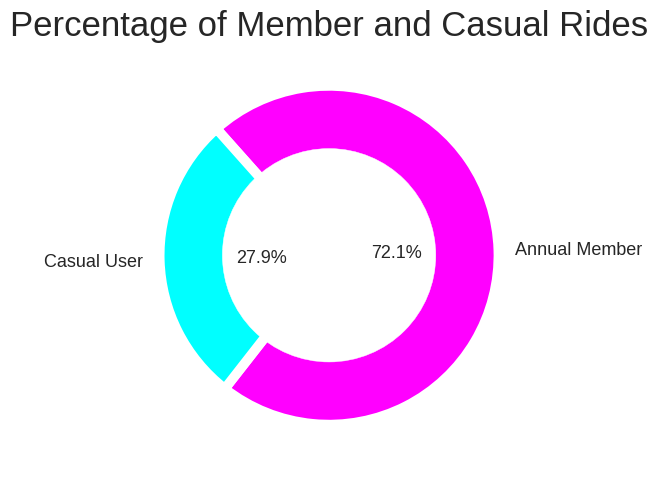

In [ ]:
# Visualize  proportions
#plt.figure()
#plt.tight_layout()
# Create a circle at the center of the plot
my_circle = plt.Circle(
    (0,0), .63,
    color='white')
# Plot pie chart
plt.pie(
    df_bstat_prop,
    labels=['Annual Member','Casual User'],
    autopct='%1.1f%%',
    startangle=232,
    textprops={'fontsize': 13},
    pctdistance=.4,
    colors=['#FF00FF',
            '#00FFFF'],
    wedgeprops = { 'linewidth' : 7,
                  'edgecolor' : 'white' })
# Get current figure
p = plt.gcf()
p.gca().add_artist(my_circle)
# Text
plt.title(
    "Percentage of Member and Casual Rides",
    fontsize=25)
# Show plot
plt.show()

The doughnut chart shows a clear depiction of the approximate 60/40 ratio of member and non-member ride counts! In my opinion, we're doing a wonderful job at Cyclistic with over half of our warm audience or people who've used our product in the last 12-months have been converted into Annual Members. That's amazing! Let's see how we can improve that number even more!

In [ ]:
# Get subset
df_hour = cyclistic_df['hour_of_day']

In [ ]:
# Describe data
df_hour.describe().to_frame()

,hour_of_day
count,84776
unique,24
top,05 PM
freq,8900


In [ ]:
# Get counts
df_hour.value_counts().head().to_frame()

,count
hour_of_day,
05 PM,8900
04 PM,8864
03 PM,8496
02 PM,8177
01 PM,7804


In [ ]:
# Get count dataframe
df_hour1 =  pd.DataFrame(df_hour.value_counts())
df_hour1.head()

,count
hour_of_day,
05 PM,8900
04 PM,8864
03 PM,8496
02 PM,8177
01 PM,7804


In [ ]:
# Update index to hours for lollipop chart
df_hour1.reset_index(inplace=True)


In [ ]:
df_hour1.head()

,hour_of_day,count
0,05 PM,8900
1,04 PM,8864
2,03 PM,8496
3,02 PM,8177
4,01 PM,7804


In [ ]:
df_hour1 = df_hour1.rename(columns = {'index':'hour','hour_of_day':'count1'})

In [ ]:
df_hour1.head()

,count1,count
0,05 PM,8900
1,04 PM,8864
2,03 PM,8496
3,02 PM,8177
4,01 PM,7804


In [ ]:
df_hour1.head()

,count1,count
0,05 PM,8900
1,04 PM,8864
2,03 PM,8496
3,02 PM,8177
4,01 PM,7804


In [ ]:
# Sort dataframe
df_hour1.sort_values('count1',axis = 0, ascending = False, inplace = True)

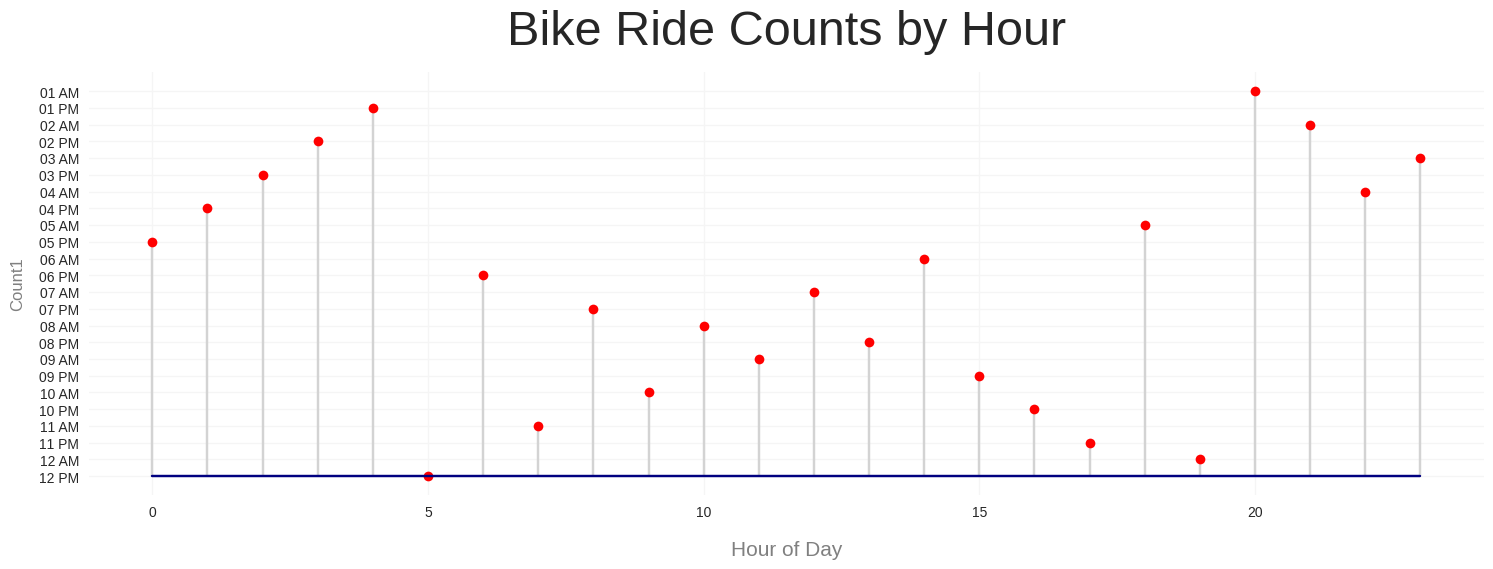

In [ ]:
# Layout
plt.figure(1,figsize=(18,5.5))
plt.tight_layout()
# Plot
plt.stem(
    df_hour1['hour'],
    df_hour1['count1'],
    orientation='vertical',
    linefmt ='lightgrey',
    markerfmt ='#ff0000',
    basefmt='#000080')
# Text
plt.title(
    "Bike Ride Counts by Hour",
    fontsize=35,
    pad= 20,
    loc='center')
plt.ylabel(
    "Count1",
    labelpad = 10,
    fontsize=12,
    color= 'grey')
plt.xlabel(
    "Hour of Day",
    labelpad = 15,
    fontsize=15,
    color= 'grey')
plt.grid(
    color='whitesmoke')
plt.show()

Appearing at a frequency of over 614,999 times in the dataset, our lollipop graph tells us that 5PM is the most popular time for bike rides!

In [ ]:
# Get proportions object
df_hour_prop = df_hour.value_counts(normalize = True).sort_values(ascending=False)
df_hour_prop.head().to_frame()

,proportion
hour_of_day,
05 PM,0.104983
04 PM,0.104558
03 PM,0.100217
02 PM,0.096454
01 PM,0.092054


In [ ]:
df_hour_prop3 = df_hour.value_counts(normalize = False).sort_values(ascending=False)

In [ ]:
df_hour_prop2 = df_hour.value_counts(normalize=True).mul(100).round(1)

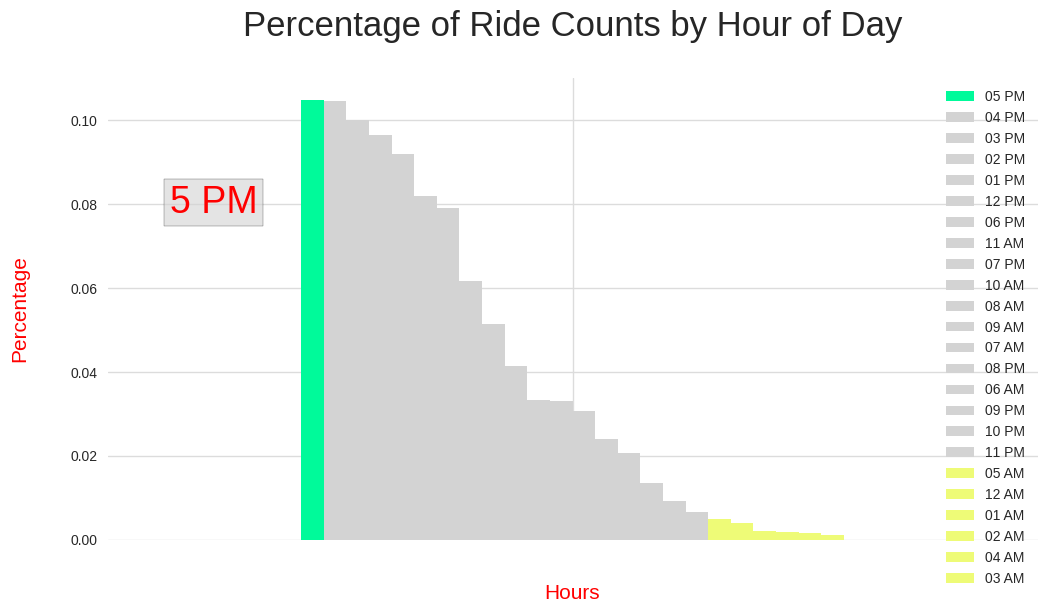

In [ ]:
# Visualize counts
# Get colors
colors = [
    '#00fa9a','lightgrey','lightgrey',
    'lightgrey','lightgrey','lightgrey',
    'lightgrey','lightgrey','lightgrey',
    'lightgrey','lightgrey','lightgrey',
    'lightgrey','lightgrey','lightgrey',
    'lightgrey','lightgrey','lightgrey',
    '#eefb77','#eefb77','#eefb77',
    '#eefb77','#eefb77','#eefb77'
]
# Plot
pd.DataFrame(
    df_hour_prop).T.plot(
    kind='bar', color= colors,
    figsize=(12,6), width=.7
)
# Ax and text
plt.xticks(
    [0],[''],rotation=0)
plt.ylabel(
    "Percentage", labelpad = 30,
    fontsize=15,color='#ff0000')
plt.xlabel(
    "Hours", labelpad = 25,
    fontsize=15,color='#ff0000')
plt.title(
    "Percentage of Ride Counts by Hour of Day",
    fontsize=25,pad=30)
W, H = 0, 0
plt.text(
    x=-.52, y=.078, s="5 PM",
    color='#ff0000',
    fontsize=27,
    bbox=dict(
        facecolor='lightgrey',
        alpha=.6))
plt.legend( loc="upper right",
    ncol=1)
# Show plot
plt.show()

We can see in the proportion distribution graph I've created above that 5PM is the sweetspot for rides accounting for over 10% of the ride counts in our data. From midnight to 5AM, we see some less popular hours. Let's highlight the top 3rd to see what hours throughout the day that users see as the absolute best times to ride Cyclistic bikes

In [ ]:
# Find highest percentiles
pd.DataFrame(df_hour_prop).head(4)

,proportion
hour_of_day,
05 PM,0.104983
04 PM,0.104558
03 PM,0.100217
02 PM,0.096454


In [ ]:
# Find proportion from 3PM to 6PM
df_hour_prop[1:4].sum()
print("Percentage of Ride Counts from 3PM to 6PM =",(df_hour_prop).head(4).sum().round(2))

Percentage of Ride Counts from 3PM to 6PM = 0.41


In [ ]:
# Find lower extremity
pd.DataFrame(df_hour_prop).tail(6)

,proportion
hour_of_day,
05 AM,0.004919
12 AM,0.003881
01 AM,0.002135
02 AM,0.001699
04 AM,0.001557
03 AM,0.001097


In [ ]:
# Find proportion from 12AM to 5AM
print("Percentage of Ride Counts from 12AM to 5AM =",(df_hour_prop).tail(6).sum().round(2))

Percentage of Ride Counts from 12AM to 5AM = 0.02


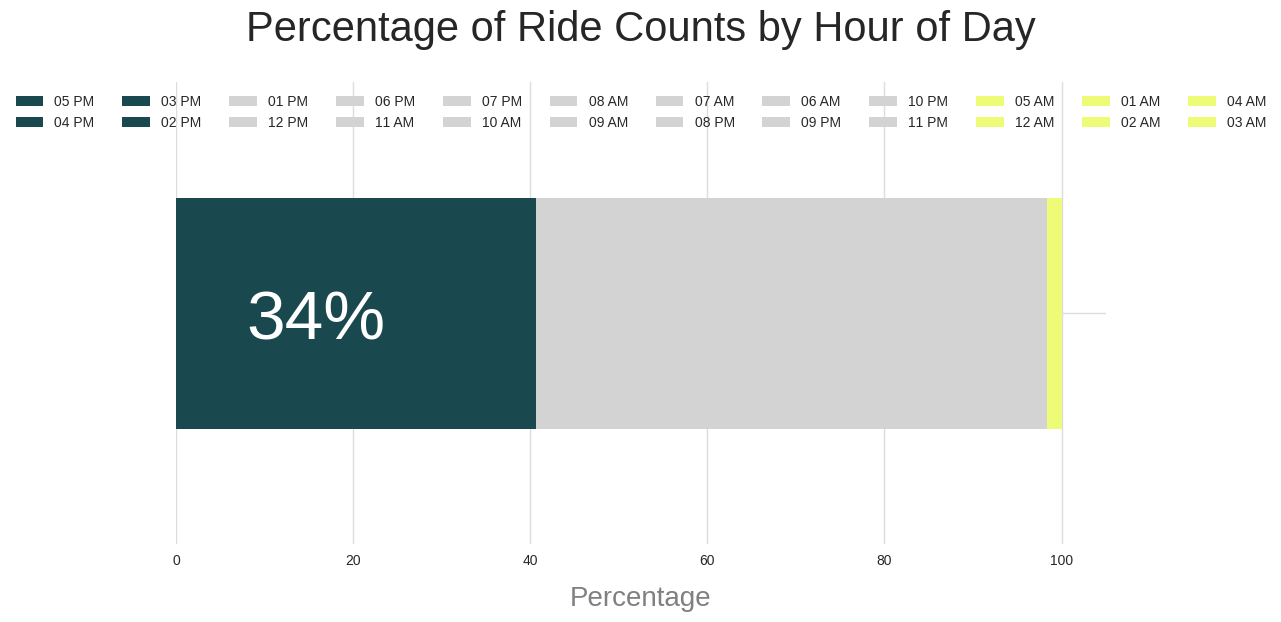

In [ ]:
colors2 = [
    '#1a484fff','#1a484fff','#1a484fff',
    '#1a484fff','lightgrey','lightgrey',
    'lightgrey','lightgrey','lightgrey',
    'lightgrey','lightgrey','lightgrey',
    'lightgrey','lightgrey','lightgrey',
    'lightgrey','lightgrey','lightgrey',
    '#eefb77','#eefb77','#eefb77',
    '#eefb77','#eefb77','#eefb77'
]
# Plot Stacked Horizonatal Bar
ax = pd.DataFrame(
    df_hour_prop2).T.plot.barh(
    stacked=True,
    rot=90,
    color= colors2,
    figsize=(12,6),
    legend=True
)
    # Axes, labels, ticks
plt.xlabel(
    "Percentage",
    labelpad=13,
    fontsize=20,
    color='grey'
)
plt.yticks(
    [0], ['']
)
plt.legend(
    loc="upper center",
    ncol=12
)
plt.text(
    8, -.055, '34%',
    color = 'white',
    fontsize = 50
)
plt.title(
    "Percentage of Ride Counts by Hour of Day",
    fontsize=30, pad= 30
)
plt.show()


Times from the afternoon to evening seem to be the most popular time for bike rides, with 3PM to 6PM being peak hours for users, accounting for roughly 34% of rides. This means that over a 3rd of the data sits just between these 4 hours of the day. As you may expect, the wee hours are the least active time, with ride count decreasing significantly from 12AM to 5AM, making up less than 5% of ride count distribution by the hour.



#day_of_week

In [ ]:
# Create subset
df_dweek = cyclistic_df['day_of_week']

In [ ]:
# Get day of week stats
df_dweek.describe().to_frame()

,day_of_week
count,84776.000000
mean,3.791557
std,2.120314
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,7.000000


In [ ]:
# Get day of week counts
df_dweek.value_counts().to_frame()

,count
day_of_week,
1,17915
7,12910
3,12813
5,11703
2,10745
6,9972
4,8718


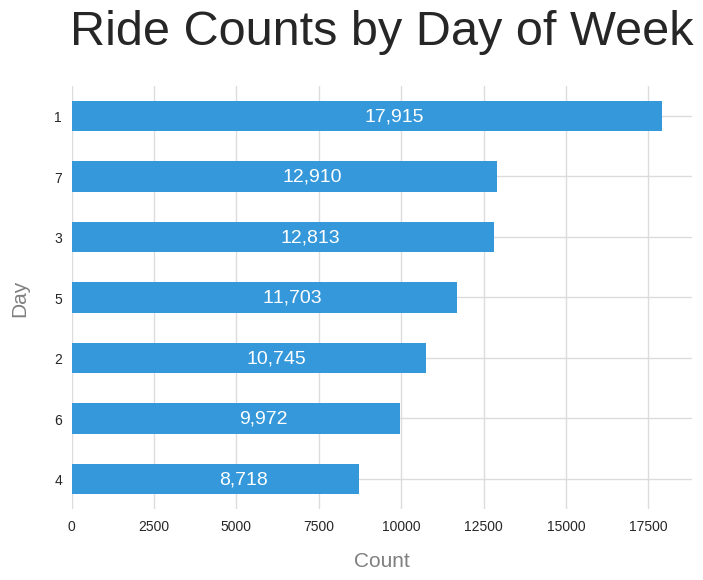

In [ ]:
# Layout
fig, ax = plt.subplots()
# Plot
df_dweek.value_counts().sort_values(
    ascending = True).plot(
    kind='barh', color='#3498db'
)
# Ax and labels
plt.xticks(
    rotation= 0
)
plt.ylabel(
    "Day", labelpad= 18,
    fontsize= 15, color= 'grey'
)
plt.xlabel(
    "Count", labelpad= 13,
    fontsize= 15, color= 'grey'
)
for i in ax.containers:
    ax.bar_label(
        i,padding= 20, label_type= 'center',
        fontsize= 14, color= 'white',
        labels=[f'{x:,.0f}' for x in i.datavalues]
    )
plt.title(
    "Ride Counts by Day of Week",
    fontsize=35, pad= 30
    )
plt.show()

In [ ]:
# Get day of week proportions
df_dweek_prop2 = df_dweek.value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False)
df_dweek_prop2.to_frame()

,proportion
day_of_week,
1,21.1
7,15.2
3,15.1
5,13.8
2,12.7
6,11.8
4,10.3


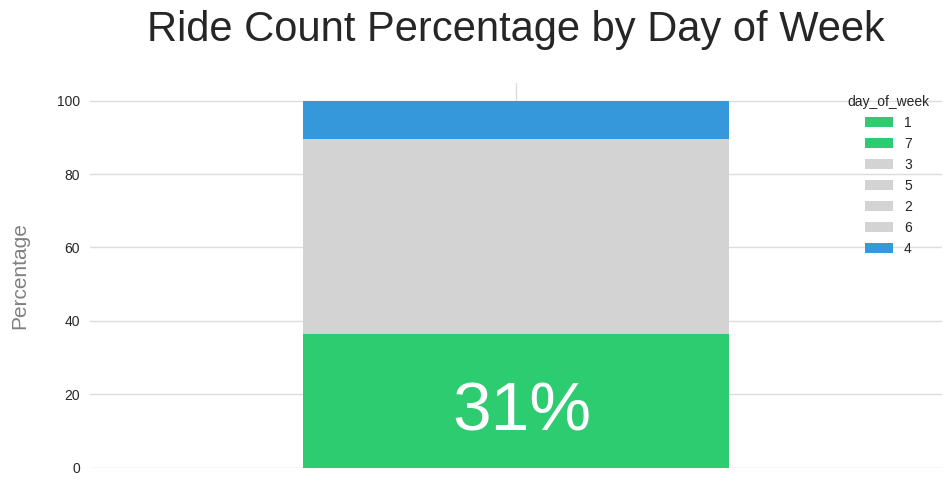

In [ ]:
# Get colors
colors3 = [
    '#2ecc71','#2ecc71',
    'lightgrey','lightgrey',
    'lightgrey','lightgrey',
    '#3498db'
]
# Plot
ax = pd.DataFrame(
    df_dweek_prop2).T.plot.bar(
    stacked=True,
    rot=90,
    color= colors3,
    figsize=(11,5),
    legend=True
)
# Ax, labels, ticks
plt.ylabel(
    "Percentage",
    labelpad= 20,
    fontsize= 15,
    color= 'grey'
)
plt.xlabel(
    "",
     labelpad= 15,
    fontsize= 20,
    color= 'grey'
          )
plt.xticks(
    [0], ['']
)
plt.text(
    -.075,10,'31%',
    color = 'w',
    fontsize = 50
)
plt.title("Ride Count Percentage by Day of Week",
          fontsize=30,
          pad= 30)
plt.show()

Saturday and Thursday logged the most rides by day of the week, together, making up 31% of the distribution.

In [ ]:
# Load the correct data into cyclistic_df
cyclistic_df

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,day_of_week,member_casual
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,00:26:49,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,1,member
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,00:08:09,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,6,member
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,00:14:23,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,4,member
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,00:12:12,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,3,member
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,00:52:55,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,7,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84772,200E9CDFC5685AA0,docked_bike,2020-04-16 16:10:16,2020-04-16 16:23:11,00:12:55,Dearborn Pkwy & Delaware Pl,140,Dearborn Pkwy & Delaware Pl,140.0,41.8990,-87.6299,41.8990,-87.6299,5,member
84773,F58A8F2ABCB5D95B,docked_bike,2020-04-30 17:56:12,2020-04-30 18:15:21,00:19:09,Kimbark Ave & 53rd St,322,Cottage Grove Ave & 51st St,351.0,41.7996,-87.5947,41.8030,-87.6066,5,casual
84774,A3754693A80E4913,docked_bike,2020-04-24 19:57:33,2020-04-24 21:50:43,01:53:10,Sedgwick St & Schiller St,236,Wells St & Elm St,182.0,41.9076,-87.6386,41.9032,-87.6343,6,casual
84775,D610CABB67F7B744,docked_bike,2020-04-02 17:59:55,2020-04-02 18:42:26,00:42:31,Damen Ave & Charleston St,310,Damen Ave & Charleston St,310.0,41.9201,-87.6779,41.9201,-87.6779,5,casual


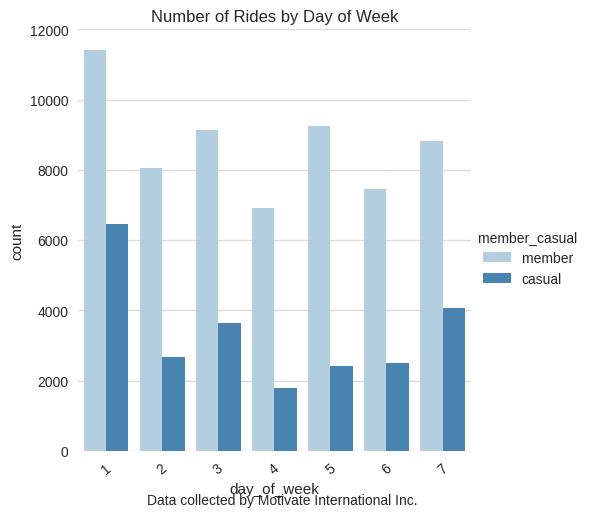

In [ ]:


# Drop rows with missing values
cyclistic_df = cyclistic_df.dropna()

# Create the plot using seaborn
sns.catplot(data=cyclistic_df, x='day_of_week', kind='count', hue='member_casual', palette='Blues')

# Set the plot title and caption
plt.title("Number of Rides by Day of Week")
plt.figtext(0.5, 0.01, "Data collected by Motivate International Inc.", ha="center")

# Rotate x-axis labels
plt.xticks(rotation=40)

# Display the plot
plt.show()

In [ ]:
cyclistic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   member_casual  2 non-null      object        
 1   started_at     2 non-null      datetime64[ns]
 2   count          2 non-null      int64         
 3   month          2 non-null      int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 184.0+ bytes


Note:Nmembers make frequent requests because they ride faster per trip. Casual members make less requests for bikes because they rider slower per trip. So whilst members are making more trips, it is because they travel faster even forlonger distances. This information is vital to convert casual members into the more attractive annual membership.

There can be a number of reasons why members ride faster: health and fitness reasons, riding to work, doing business with the bikes.

#Ride Length by ride type and Day of Week

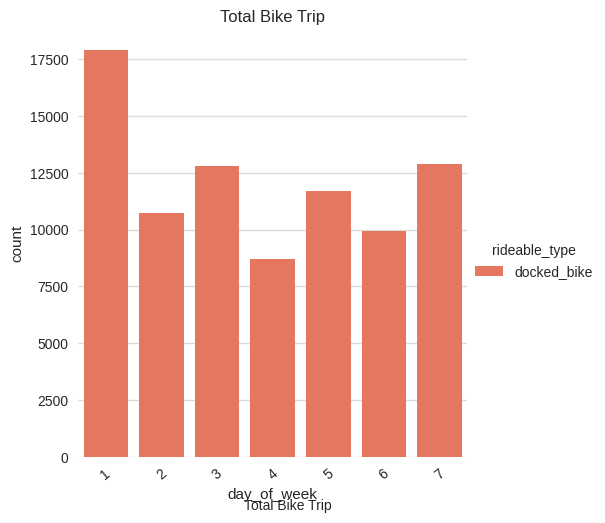

In [ ]:

# Drop rows with missing values
cyclistic_df = cyclistic_df.dropna()

# Group by day_of_week and rideable_type
grouped_data = cyclistic_df.groupby(['day_of_week', 'rideable_type']).size().reset_index(name='count')

# Create the plot using seaborn
sns.catplot(data=grouped_data, x='day_of_week', y='count', hue='rideable_type', kind='bar', palette='Reds')

# Set the plot title and caption
plt.title("Total Bike Trip")
plt.figtext(0.5, 0.01, "Total Bike Trip",  ha="center")

# Rotate x-axis labels
plt.xticks(rotation=40)

# Display the plot
plt.show()

Average Bike Trip
* Docked bikes were used for long trips. followed by Electrib bikes
* Classic bikes were used for shorter trips

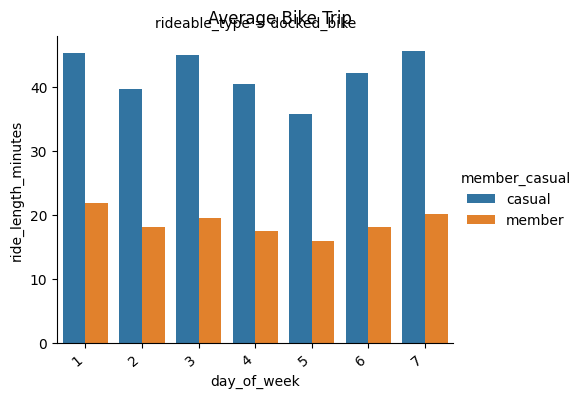

In [18]:
import datetime

# Convert ride_length to timedelta objects
cyclistic_df["ride_length_timedelta"] = cyclistic_df["ride_length"].apply(lambda x: datetime.timedelta(hours=x.hour, minutes=x.minute, seconds=x.second))

# Calculate average ride length in minutes
cyclistic_df["ride_length_minutes"] = cyclistic_df["ride_length_timedelta"] / datetime.timedelta(minutes=1)

# Group by day_of_week, rideable_type, and member_casual
grouped_data = cyclistic_df.groupby(['day_of_week', 'rideable_type', 'member_casual'])['ride_length_minutes'].mean().reset_index()

# Create the plot using Seaborn
sns.catplot(data=grouped_data, x='day_of_week', y='ride_length_minutes', hue='member_casual',
            col='rideable_type', kind='bar', height=4, aspect=1.2, dodge=True)


# Set the plot title and caption
plt.suptitle("Average Bike Trip")
plt.figtext(0.5, 0.01, "", ha="center")

# Rotate x-axis labels
plt.xticks(rotation=40, ha='right')

# Display the plot
plt.show()

#Which bikes were used the most during the first quarter
Note: casual members made more requests for all the bike types than casual members

Docked bikes were the most requested, by both groups.

#Observation of how differently the two groups use the service
Note: Members make multiple requests within a day because, they ride faster and they are able to cover longer distances: As earlier stated they use bike for business, leasure, and fitness. Casual members make fewer requests in a day because, they ride slow spending more time over shorter distances. Marketing should leverage this insight to influence the behavior of casual members. Through this influence we can get them converted to annaul members.

In [ ]:
# Drop rows with missing values
cyclistic_df = cyclistic_df.dropna()

# Group by member_casual and count the occurrences
grouped_data = cyclistic_df.groupby('member_casual').size().reset_index(name='count')

# Display the grouped data
print(grouped_data)

  member_casual  count
0        casual      1
1        member      1


#Let's visualise it

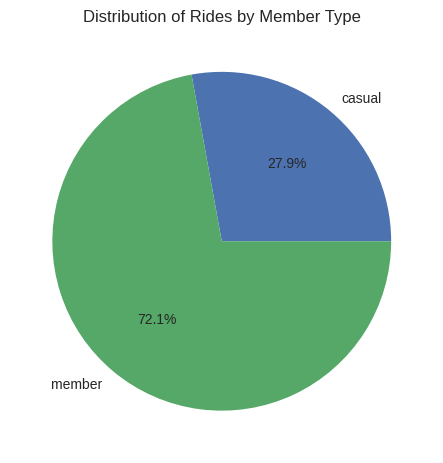

In [ ]:

# Drop rows with missing values
cyclistic_df = cyclistic_df.dropna()

# Group by member_casual and count the occurrences
grouped_data = cyclistic_df.groupby('member_casual').size().reset_index(name='count')

# Create a pie chart using matplotlib
plt.pie(grouped_data['count'], labels=grouped_data['member_casual'], autopct='%1.1f%%')
plt.title('Distribution of Rides by Member Type')
plt.show()

It is obvious that members use the service more and We know how the two groups use the service differently.

* It might be possible for casual members opt for annual membership.

In [ ]:
#Membership growth by week

# Drop rows with missing values (consider handling missing values differently if needed)
cyclistic_df = cyclistic_df.dropna()

# Group and count data by member_casual and month
grouped_data = (
    cyclistic_df.groupby(['member_casual', pd.DatetimeIndex(cyclistic_df['started_at']).weekday])
    .size()
    .to_frame(name='count')
    .reset_index()
)

# Create the plot
sns.lineplot(data=grouped_data, x=pd.DatetimeIndex(grouped_data['started_at']).weekday, y='count', hue='member_casual')

# Customize x-axis labels (optional)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('weekday')  # Add label for x-axis

# Add title and grid (optional)
plt.title('Membership Growth by week')
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
#membership growth by month

# Drop rows with missing values
cyclistic_df = cyclistic_df.dropna()

# Extract month from the 'started_at' column
cyclistic_df['month'] = pd.DatetimeIndex(cyclistic_df['started_at']).month

# Count occurrences by member_casual and month
grouped_data = cyclistic_df.groupby(['member_casual', 'month']).size().reset_index(name='count')

# Create the plot using seaborn
sns.lineplot(data=grouped_data, x='month', y='count', hue='member_casual')

# Set the plot title
plt.title('Membership Growth')

# Set x-axis and y-axis labels
plt.xlabel('Month')
plt.ylabel('Count')

# Set legend title
plt.legend(title='Member Type')

# Display the plot
plt.show()

As we can see, the analysis indicates the membership growth over time for each member type in the Cyclistic dataset. By plotting the running total of the count of occurrences for each member type, we can observe the trend and compare the growth between casual and member users.

The line plot shows the change in the running total of occurrences over time. If the lines for both member types are increasing steadily or at a similar rate, it suggests that both casual and member users are contributing to the overall growth of the membership base. On the other hand, if one line is growing significantly faster than the other, it indicates a difference in the the growth rate between the two member types.

Additionally, by comparing the slopes of the lines, we can gain insights into the relative growth rates of casual and member users. A steeper slope indicates a faster growth rate, while a flatter slope suggests a slower growth rate.

Overall, this analysis helps to visualize and compare the membership growth trends between different user types, providing valuable insights into the performance and engagement of the Cyclistic bike-sharing service.

#Conclusion

The majority of Cyclistic's market is captured by annual members, who have subscribed to the program for their business, leisure, and fitness needs. The Rails-to-Trails Conservancy report validates this observation. These annual members tend to ride at a faster pace, cover longer distances, and make frequent ride requests. In contrast, casual members ride at a slower pace, travel shorter distances, and consequently make fewer ride requests. To convert casual customers into annual members, we would need to modify the behavior of casual members so that they ride at a faster pace, cover longer distances, and make more ride requests.
#Why would casual riders buy Cyclistic annual memberships?

* Convenience: Casual riders can enjoy the convenience of having their bikes maintained and repaired without having to worry about scheduling appointments or finding a reliable bike shop.
* Cost savings: Cyclistic's annual membership fee can be more cost-effective for casual riders who frequently need bike maintenance and repairs.
* Access to exclusive benefits: Cyclistic can offer exclusive benefits to its members, such as discounts on bike accessories, priority access to new products, and invitations to special events.
* Community: Cyclistic can create a sense of community among its members by organizing group rides, workshops, and other social events.

#How can Cyclistic use digital media to influence casual riders to become members?

* Educational content: Cyclistic can use digital media to create and share educational content about bike maintenance, safety, and other topics of interest to casual riders.
* Social media engagement: Cyclistic can use social media to engage with casual riders, answer their questions, and promote its membership program.
* Targeted advertising: Cyclistic can use digital advertising to target casual riders with personalized messages about the benefits of its annual membership.
* Influencer marketing: Cyclistic can partner with influencers in the cycling community to promote its membership program to their followers.
* Email marketing: Cyclistic can use email marketing to nurture leads and encourage casual riders to sign up for its annual membership.

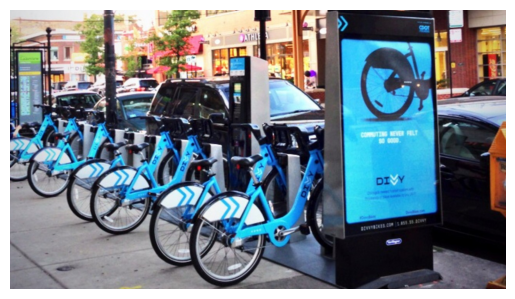

In [30]:
bikeshare_1 = '/content/drive/MyDrive/bikeshare_1.jpg'
bikeshare_1_image = Image.open(bikeshare_1)

# Display the image using matplotlib
plt.imshow(bikeshare_1_image)
plt.axis('off')
plt.show()